In [1]:
import sys
sys.path.append('../')
import PhlyGreen as pg
import numpy as np
import matplotlib.pyplot as plt
# import scipy.integrate as integrate
from mpl_toolkits.mplot3d import Axes3D

In [2]:
powertrain = pg.Systems.Powertrain.Powertrain(None)
structures = pg.Systems.Structures.Structures(None)
aerodynamics = pg.Systems.Aerodynamics.Aerodynamics(None)
performance = pg.Performance.Performance(None)
mission = pg.Mission.Mission(None)
weight = pg.Weight.Weight(None)
constraint = pg.Constraint.Constraint(None)
welltowake = pg.WellToWake.WellToWake(None)
climateimpact = pg.ClimateImpact.ClimateImpact(None)

myaircraft = pg.Aircraft(powertrain, structures, aerodynamics, performance, mission, weight, constraint, welltowake, climateimpact)

powertrain.aircraft = myaircraft
structures.aircraft = myaircraft
aerodynamics.aircraft = myaircraft
mission.aircraft = myaircraft
performance.aircraft = myaircraft
weight.aircraft = myaircraft
constraint.aircraft = myaircraft
welltowake.aircraft = myaircraft
climateimpact.aircraft = myaircraft

ConstraintsInput = {'speed': np.array([0.4, 140, 170, 210, 0.5, 0.35, 104.]) ,
                    'speedtype': ['Mach','KCAS','KCAS','KCAS','Mach','Mach','KCAS']   ,
                    'beta': np.array([0.95,0.985,0.97, 0.9, 0.8, 0.9, None])   ,
                    'altitude': np.array([8000., 100., 6000., 5000, 9500., 6000, 500.]),
                    'load factor': np.array([1., None, 1., 1.1, 1., 1., None]),
                    'DISA': 0, 
                    'kTO': 1.2,
                    'sTO': 950,
                    'OEI Climb Gradient': 0.021,
                    'Rate of Climb': 5,  #5m/s ~= 1000 ft/min, 7.6 ~= 1500 ft/min
                    'ht': 0.5,
                    'M1': 0.3,
                    'M2': 0.4,
                    'DTAcceleration': 180}

MissionInput = {'Range Mission': 750,  #nautical miles
                'Range Diversion': 220,  #nautical miles
                'Beta start': 0.985,
                'Payload Weight': 4560,  #Kg
                'Crew Weight': 500}  #Kg

DiversionStages = {'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.06, 'Speed': 110, 'StartAltitude': 200, 'EndAltitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.2, 'Altitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 3100, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

EnergyInput = {'Ef': 43.5*10**6,
                   'Eta Gas Turbine Model': 'PW127',
                   #'Eta Gas Turbine': 0.22,
                   'Eta Gearbox': 0.96,
                   'Eta Propulsive Model': 'constant',
                   'Eta Propulsive': 0.75,
                   'Specific Power Powertrain': [3900,0]  # W/Kg
                   }

AerodynamicsInput = {'NumericalPolar': {'type': 'ATR42'}}

ClimateImpactInput = {'H': 100, 'N':497*50, 'Y':30, 'EINOx_model':'Filippone'}

myaircraft.ConstraintsInput = ConstraintsInput
myaircraft.AerodynamicsInput = AerodynamicsInput
myaircraft.MissionInput = MissionInput
myaircraft.DiversionStages = DiversionStages
myaircraft.EnergyInput = EnergyInput
myaircraft.ClimateImpactInput = ClimateImpactInput
myaircraft.Configuration = 'Traditional'

myaircraft.constraint.SetInput()
myaircraft.aerodynamics.SetInput()
myaircraft.powertrain.SetInput()
myaircraft.weight.SetInput()
myaircraft.climateimpact.SetInput()

In [3]:
years = np.linspace(0, myaircraft.climateimpact.H+1, 30)
mach = np.linspace(0.3, 0.55, 20)

years_grid, mach_grid = np.meshgrid(years, mach)

DeltaT_values = np.zeros_like(years_grid)

In [4]:
# WTOoS = np.array([])
# PW = np.array([])
# fuel_mass = np.array([])   
# structure_mass = np.array([])
# powertrain_mass = np.array([])
# takeoff_weight = np.array([])
# wing_surface = np.array([])
# CO2 = np.array([])
# H2O = np.array([])
# SO4 = np.array([])
# soot = np.array([])
# NOx = np.array([])
# ATR = np.array([])

In [5]:
# for i in range(len(mach)):
#     MissionStages = {'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.12, 'Speed': 77, 'StartAltitude': 100, 'EndAltitude': 1500}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
#                  'Climb2': {'type': 'ConstantRateClimb', 'input': {'CB': 0.06, 'Speed': 110, 'StartAltitude': 1500, 'EndAltitude': 4500}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
#                  'Climb3': {'type': 'ConstantRateClimb', 'input': {'CB': 0.05, 'Speed': 110, 'StartAltitude': 4500, 'EndAltitude': 8000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
#                  'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': mach[i], 'Altitude': 8000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
#                  'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 8000, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}
#     myaircraft.MissionStages = MissionStages
#     myaircraft.mission.InitializeProfile()
#     myaircraft.mission.SetInput()

#     myaircraft.constraint.FindDesignPoint()
#     WTOoS = np.append(WTOoS,myaircraft.DesignWTOoS)
#     PW = np.append(WTOoS,myaircraft.DesignPW)

#     myaircraft.weight.WeightEstimation()
#     fuel_mass = np.append(fuel_mass, myaircraft.weight.Wf)  # [kg]  riserva non compresa
#     structure_mass = np.append(structure_mass, myaircraft.weight.WStructure)  # [kg]
#     powertrain_mass = np.append(powertrain_mass, myaircraft.weight.WPT)  # [kg]
#     takeoff_weight = np.append(takeoff_weight, myaircraft.weight.WTO)  # [kg]

#     myaircraft.WingSurface = myaircraft.weight.WTO / myaircraft.DesignWTOoS * myaircraft.performance.g_acc 
#     wing_surface = np.append(wing_surface, myaircraft.WingSurface)

#     myaircraft.climateimpact.calculate_mission_emissions()
#     CO2 = np.append(CO2, myaircraft.climateimpact.mission_emissions['co2'])  # [kg]
#     H2O = np.append(H2O, myaircraft.climateimpact.mission_emissions['h2o'])  # [kg]
#     SO4 = np.append(SO4, myaircraft.climateimpact.mission_emissions['so4'])  # [kg]
#     soot = np.append(soot, myaircraft.climateimpact.mission_emissions['soot'])  # [kg]
#     NOx = np.append(NOx, myaircraft.climateimpact.mission_emissions['nox'])  # [kg]

#     atr = myaircraft.climateimpact.ATR()
#     ATR = np.append(ATR, atr)

#     for j in range(len(years)):
#         DeltaT_values[i,j] = myaircraft.climateimpact.DeltaT(years[j])


In [6]:
# np.savez('output_param_speed.npz',
#          WTOoS=WTOoS,
#          PW=PW,
#          fuel_mass=fuel_mass,
#          structure_mass=structure_mass,
#          powertrain_mass=powertrain_mass,
#          takeoff_weight=takeoff_weight,
#          wing_surface=wing_surface,
#          CO2=CO2,
#          H2O=H2O,
#          SO4=SO4,
#          soot=soot,
#          NOx=NOx,
#          ATR=ATR,
#          DeltaT_values=DeltaT_values)

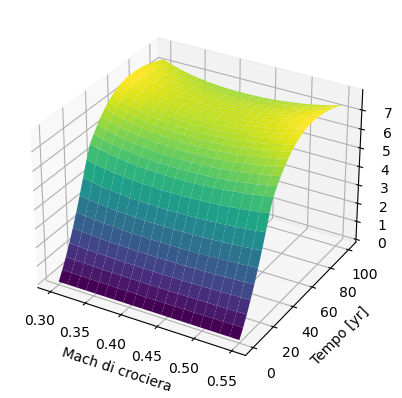

In [7]:
data = np.load('output_param_speed.npz')
DeltaT_values = data['DeltaT_values']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(mach_grid, years_grid, DeltaT_values, cmap='viridis')

ax.set_xlabel('Mach di crociera')
ax.set_ylabel('Tempo [yr]')
ax.set_zlabel(r'$\Delta$T [K]')
plt.show()

In [8]:
ATR = data['ATR']
ATR_min = np.min(ATR)
indice_minimo = np.argmin(ATR)
print(mach[indice_minimo])

0.41842105263157897


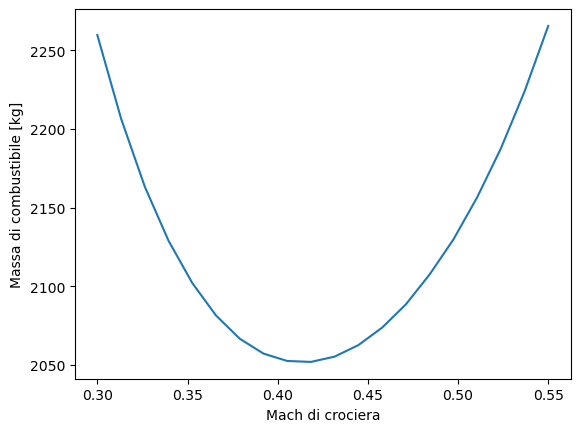

In [9]:
fuel_mass = data['fuel_mass']
plt.plot(mach, fuel_mass)
plt.xlabel('Mach di crociera')
plt.ylabel('Massa di combustibile [kg]')
plt.show()